In [36]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Part 1: Prepare the data

1. Read `myopia.csv` into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

    * **Note:** The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already! 

3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [37]:
# Load the data
file_path = ("/Users/tanishacooper/code/unsupervised_machine_learning/Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [145]:
# Show columns
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [39]:
# Show value count for MYOPIC colum.
df_myopia['MYOPIC'].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [152]:
# Drop the 'MYOPIC' column - Not needed for unsupervised learning...
myopia_data = df_myopia.drop(['MYOPIC'], axis='columns')
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


### Data Transformation

In [41]:
# Save the cleaned DataFrame as a new CSV file for further use
new_file_path = Path("/Users/tanishacooper/code/unsupervised_machine_learning/Resources/myopia_data_new")
myopia_data.to_csv(new_file_path, index=False)

In [150]:
# Standarize data with StandardScaler
myopia_scaled = StandardScaler().fit_transform(myopia_data)
# print(myopia_scaled[0:5])

# Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. <strong>How did the number of the features change?</strong>
<ul>
<li><em>The change in features were reduced from 14 to 10 with 618 samples.</em></li>
<li><em>The outputs of the PCA can be used as input to train a model.</em></li>
<li><em>PCA is a method used to reduce number of variables in your data by extracting important ones from a large pool.</em></li> 
<li><em>It reduces the dimension of the data with the aim of retaining as much information as possible (~90% for our data below).</em></li> 
<li><em>In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.</em></li>
    </ul>


  * **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

3. Create a scatter plot of the t-SNE output. Are there distinct clusters?


In [147]:
# Perform demensionality reduction with PCA preserving approximately 90% of the explained variance

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components for the myopia data
myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [44]:
# Put myopia_pca data into a DataFrame (myopia_pca dimensions are 618 by 10 (618 rows and 10 columns))
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2","principal component 3",
                             "principal component 4","principal component 5","principal component 6",
                             "principal component 7","principal component 8","principal component 9",
                             "principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


### PCA Explained Variance

- Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by a PCA.
- This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis. 
- The larger the variance explained by a principal component, the more important that component is.

In [45]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

### Determine clusters (k) in K-means model

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2. See Part 3

In [127]:
# Predicting clusters with k=2

# Initialize the k-means model
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the dataframe
df_myopia_pca["MYOPIC"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,MYOPIC
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


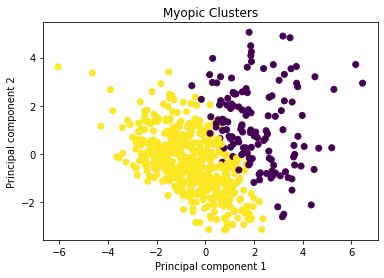

In [128]:
# Visualize the clusters
plt.scatter(x=df_myopia_pca['principal component 1'], y=df_myopia_pca['principal component 2'], 
            c=df_myopia_pca['MYOPIC'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopic Clusters')
plt.show()

### TSNE Parameter Guide: [Doc](https://opentsne.readthedocs.io/en/latest/parameters.html)
In most implementations, perplexity defaults to 30. This focuses the attention of t-SNE on preserving the distances to its 30 nearest neighbors and puts virtually no weight on preserving distances to the remaining points. For data sets with a small number of points e.g. 100, this will uncover the global structure quite well since each point will preserve distances to a third of the data set.

In [153]:
# Create a new dataframe for t-SNE using principal df
df2 = df_myopia_pca
df2_myopic = df2.drop(['MYOPIC'], axis=1)
labels = df2['MYOPIC']
df2_myopic.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [136]:
# # Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [154]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df2_myopic)
# tsne_features
# df2_myopic.dtypes

In [155]:
# Dataset has 2 columns and 618 samples (records)
tsne_features.shape

(618, 2)

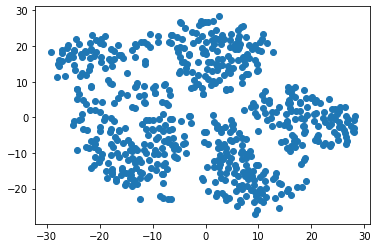

In [160]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

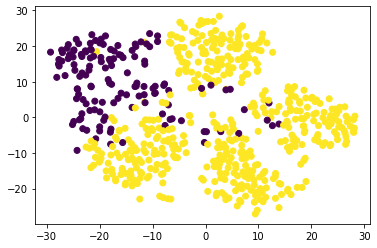

In [161]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [159]:
labels.value_counts()

1    479
0    139
Name: MYOPIC, dtype: int64

# Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

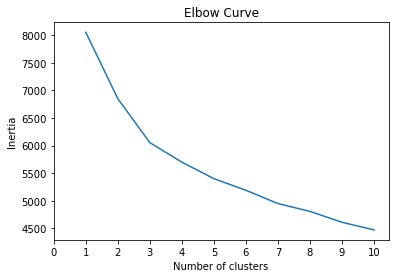

In [162]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [66]:
df_elbow

,k,inertia
0,1,8303.850329
1,2,6931.235005
2,3,6039.595777
3,4,5696.646720
4,5,5446.303101
5,6,5208.929016
6,7,4965.655842
7,8,4808.809178
8,9,4653.089517
9,10,4505.564355
